## Name Entity Recognition

Spacy comes with an extremely fast statistical entity recognition system that assigns labels to contiguous spans of tokens.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
import spacy
from spacy import displacy
import en_core_web_sm 
from pprint import pprint


The text below was extrated from The Guardian News in March 7th, 2020. You can check the entire article [here](#https://www.theguardian.com/science/2021/mar/04/scientists-discovered-migraine-mechanism-win-brain-prize)

In [2]:
text = 'Four scientists who discovered a key mechanism that causes migraines, paving the way for new \
preventive treatments, have won the largest prize for neuroscience in the world, sharing £1.1m.\
The Lundbeck Foundation in Denmark announced on Thursday that the British researcher Peter Goadsby, \
Michael Moskowitz of the US, Lars Edvinsson of Sweden and Jes Olesen of Denmark had won the Brain prize.'

In [3]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [4]:
sent = preprocess(text)
sent # Words and their associated part-of-speech.

[('Four', 'CD'),
 ('scientists', 'NNS'),
 ('who', 'WP'),
 ('discovered', 'VBD'),
 ('a', 'DT'),
 ('key', 'JJ'),
 ('mechanism', 'NN'),
 ('that', 'WDT'),
 ('causes', 'VBZ'),
 ('migraines', 'NNS'),
 (',', ','),
 ('paving', 'VBG'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('for', 'IN'),
 ('new', 'JJ'),
 ('preventive', 'JJ'),
 ('treatments', 'NNS'),
 (',', ','),
 ('have', 'VBP'),
 ('won', 'VBN'),
 ('the', 'DT'),
 ('largest', 'JJS'),
 ('prize', 'NN'),
 ('for', 'IN'),
 ('neuroscience', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 (',', ','),
 ('sharing', 'VBG'),
 ('£1.1m.The', 'JJ'),
 ('Lundbeck', 'NNP'),
 ('Foundation', 'NNP'),
 ('in', 'IN'),
 ('Denmark', 'NNP'),
 ('announced', 'VBD'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('British', 'JJ'),
 ('researcher', 'NN'),
 ('Peter', 'NNP'),
 ('Goadsby', 'NNP'),
 (',', ','),
 ('Michael', 'NNP'),
 ('Moskowitz', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 (',', ','),
 ('Lars', 'NNP'),
 ('Edvinsson', 'NNP'

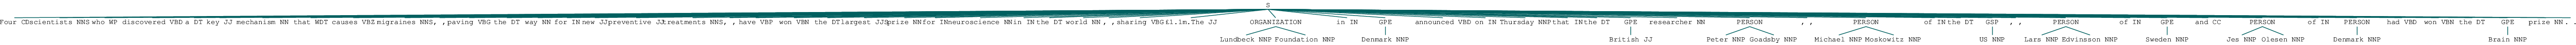

In [5]:
entities = nltk.chunk.ne_chunk(sent)
entities

There is one token per line, each with its part-of-speech tag and its named entity tag. Returning a list of 3-tuples containing (word, tag, IOB-tag). IOB-tadg is a format for tagging tokens in a chunking task


In [6]:
iob_tagged = tree2conlltags(sent) 
pprint(iob_tagged)

[('Four', 'CD', 'O'),
 ('scientists', 'NNS', 'O'),
 ('who', 'WP', 'O'),
 ('discovered', 'VBD', 'O'),
 ('a', 'DT', 'O'),
 ('key', 'JJ', 'O'),
 ('mechanism', 'NN', 'O'),
 ('that', 'WDT', 'O'),
 ('causes', 'VBZ', 'O'),
 ('migraines', 'NNS', 'O'),
 (',', ',', 'O'),
 ('paving', 'VBG', 'O'),
 ('the', 'DT', 'O'),
 ('way', 'NN', 'O'),
 ('for', 'IN', 'O'),
 ('new', 'JJ', 'O'),
 ('preventive', 'JJ', 'O'),
 ('treatments', 'NNS', 'O'),
 (',', ',', 'O'),
 ('have', 'VBP', 'O'),
 ('won', 'VBN', 'O'),
 ('the', 'DT', 'O'),
 ('largest', 'JJS', 'O'),
 ('prize', 'NN', 'O'),
 ('for', 'IN', 'O'),
 ('neuroscience', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('world', 'NN', 'O'),
 (',', ',', 'O'),
 ('sharing', 'VBG', 'O'),
 ('£1.1m.The', 'JJ', 'O'),
 ('Lundbeck', 'NNP', 'O'),
 ('Foundation', 'NNP', 'O'),
 ('in', 'IN', 'O'),
 ('Denmark', 'NNP', 'O'),
 ('announced', 'VBD', 'O'),
 ('on', 'IN', 'O'),
 ('Thursday', 'NNP', 'O'),
 ('that', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('British', 'JJ', 'O'),
 ('resea

In [7]:
nlp = en_core_web_sm.load()
doc = nlp(text)
pprint([(X.text, X.label_) for X in doc.ents])

[('Four', 'CARDINAL'),
 ('The Lundbeck Foundation', 'ORG'),
 ('Denmark', 'GPE'),
 ('Thursday', 'DATE'),
 ('British', 'NORP'),
 ('Peter Goadsby', 'PERSON'),
 ('Michael Moskowitz', 'PERSON'),
 ('US', 'GPE'),
 ('Lars Edvinsson', 'GPE'),
 ('Sweden', 'GPE'),
 ('Jes Olesen', 'PERSON'),
 ('Denmark', 'GPE')]


In [8]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Four, 'B', 'CARDINAL'),
 (scientists, 'O', ''),
 (who, 'O', ''),
 (discovered, 'O', ''),
 (a, 'O', ''),
 (key, 'O', ''),
 (mechanism, 'O', ''),
 (that, 'O', ''),
 (causes, 'O', ''),
 (migraines, 'O', ''),
 (,, 'O', ''),
 (paving, 'O', ''),
 (the, 'O', ''),
 (way, 'O', ''),
 (for, 'O', ''),
 (new, 'O', ''),
 (preventive, 'O', ''),
 (treatments, 'O', ''),
 (,, 'O', ''),
 (have, 'O', ''),
 (won, 'O', ''),
 (the, 'O', ''),
 (largest, 'O', ''),
 (prize, 'O', ''),
 (for, 'O', ''),
 (neuroscience, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (world, 'O', ''),
 (,, 'O', ''),
 (sharing, 'O', ''),
 (£, 'O', ''),
 (1.1m, 'O', ''),
 (., 'O', ''),
 (The, 'B', 'ORG'),
 (Lundbeck, 'I', 'ORG'),
 (Foundation, 'I', 'ORG'),
 (in, 'O', ''),
 (Denmark, 'B', 'GPE'),
 (announced, 'O', ''),
 (on, 'O', ''),
 (Thursday, 'B', 'DATE'),
 (that, 'O', ''),
 (the, 'O', ''),
 (British, 'B', 'NORP'),
 (researcher, 'O', ''),
 (Peter, 'B', 'PERSON'),
 (Goadsby, 'I', 'PERSON'),
 (,, 'O', ''),
 (Michael, 'B', 'PERSON'),
 

In [9]:
doc=nlp(text)
displacy.render(doc, style='ent', jupyter=True)

## References
* https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
* https://towardsdatascience.com/named-entity-recognition-ner-using-spacy-nlp-part-4-28da2ece57c6
* https://www.theguardian.com/science/2021/mar/04/scientists-discovered-migraine-mechanism-win-brain-prize